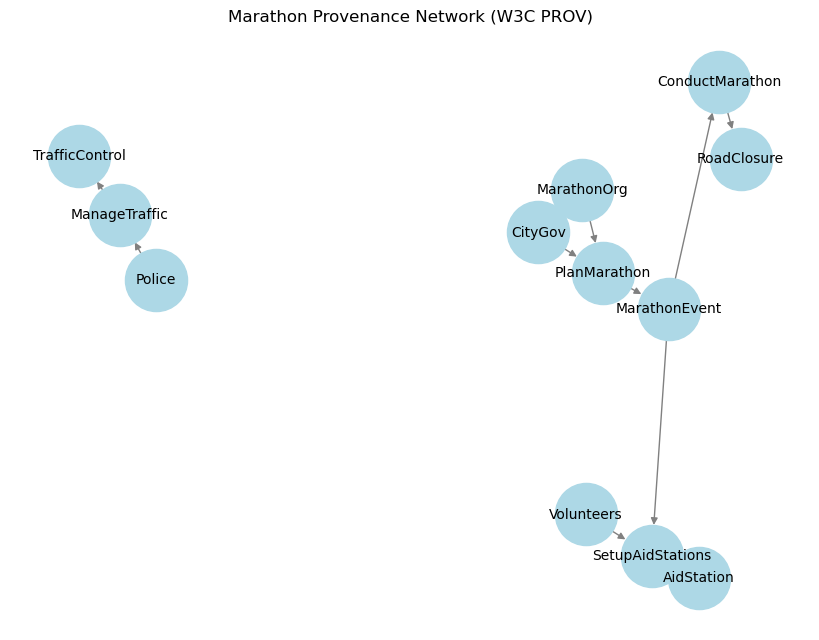

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Define nodes (Agents, Entities, Activities)
agents = ["CityGov", "MarathonOrg", "Police", "Volunteers"]
entities = ["RoadClosure", "AidStation", "MarathonEvent", "TrafficControl"]
activities = ["PlanMarathon", "SetupAidStations", "ConductMarathon", "ManageTraffic"]

# Add nodes to the graph
for node in agents + entities + activities:
    G.add_node(node, type="Agent" if node in agents else ("Entity" if node in entities else "Activity"))

# Define edges (PROV relationships)
edges = [
    ("CityGov", "PlanMarathon"),
    ("MarathonOrg", "PlanMarathon"),
    ("PlanMarathon", "MarathonEvent"),
    ("MarathonEvent", "SetupAidStations"),
    ("Volunteers", "SetupAidStations"),
    ("SetupAidStations", "AidStation"),
    ("MarathonEvent", "ConductMarathon"),
    ("Police", "ManageTraffic"),
    ("ManageTraffic", "TrafficControl"),
    ("ConductMarathon", "RoadClosure"),
]

# Add edges to the graph
G.add_edges_from(edges)

# Draw the network
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, edge_color="gray")
plt.title("Marathon Provenance Network (W3C PROV)")
plt.show()


Top 5 nodes by PageRank:
AidStation: 0.1400
MarathonEvent: 0.1226
SetupAidStations: 0.1210
RoadClosure: 0.1131
PlanMarathon: 0.1005


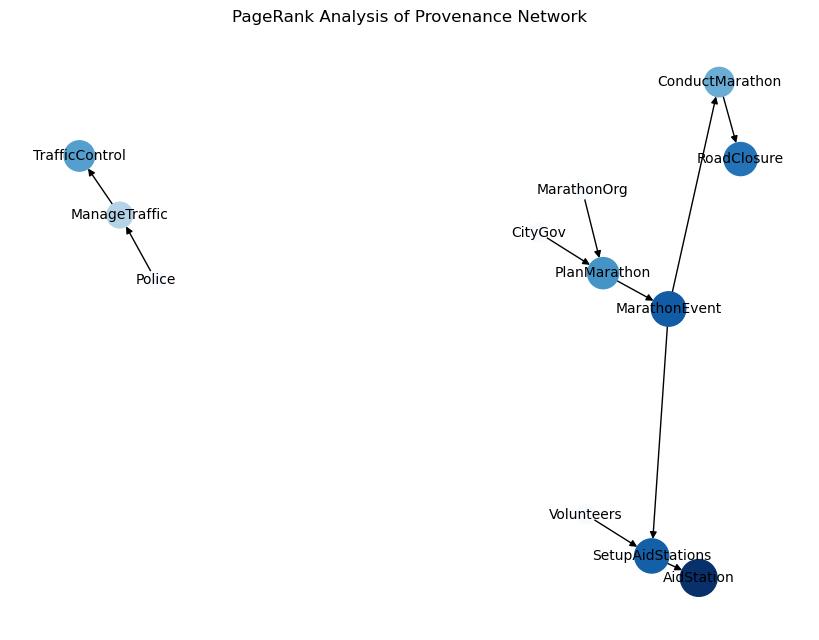

In [2]:
# Compute PageRank
pagerank_scores = nx.pagerank(G)

# Sort nodes by PageRank value
sorted_pagerank = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)

# Print results
print("Top 5 nodes by PageRank:")
for node, score in sorted_pagerank[:5]:
    print(f"{node}: {score:.4f}")

# Visualize PageRank scores
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=[v * 5000 for v in pagerank_scores.values()],
        node_color=list(pagerank_scores.values()), cmap=plt.cm.Blues, font_size=10)
plt.title("PageRank Analysis of Provenance Network")
plt.show()


In [ ]:
import pykeen
from pykeen.pipeline import pipeline

# Train TransE Model
transE_results = pipeline(
    model="TransE",
    dataset="codexmedium",
    training_loop="sLCWA",
    epochs=50,
)

# Train RotatE Model
rotate_results = pipeline(
    model="RotatE",
    dataset="codexmedium",
    training_loop="sLCWA",
    epochs=50,
)

# Train GCN Model
gcn_results = pipeline(
    model="GCN",
    dataset="codexmedium",
    training_loop="sLCWA",
    epochs=50,
)

# Print results
print(f"TransE Mean Rank: {transE_results.metric_results['mean_rank']:.2f}")
print(f"RotatE Mean Rank: {rotate_results.metric_results['mean_rank']:.2f}")
print(f"GCN Mean Rank: {gcn_results.metric_results['mean_rank']:.2f}")


C:\Users\Lenovo\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No random seed is specified. Setting to 1860094669.

In [ ]:
import torch

# Load trained embeddings
transE_embedding = transE_results.model.entity_representations[0](indices=torch.arange(len(G.nodes)))
rotate_embedding = rotate_results.model.entity_representations[0](indices=torch.arange(len(G.nodes)))
gcn_embedding = gcn_results.model.entity_representations[0](indices=torch.arange(len(G.nodes)))

# Convert embeddings to NumPy
transE_np = transE_embedding.detach().numpy()
rotate_np = rotate_embedding.detach().numpy()
gcn_np = gcn_embedding.detach().numpy()

# Visualize embeddings
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_embeddings(embeddings, title):
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(embeddings)
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced[:, 0], reduced[:, 1], c="blue", alpha=0.6)
    plt.title(title)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.show()

plot_embeddings(transE_np, "TransE Embeddings")
plot_embeddings(rotate_np, "RotatE Embeddings")
plot_embeddings(gcn_np, "GCN Embeddings")
